# Systems of Linear Equations

```{contents}
:local:
```

In [1]:
%config InlineBackend.figure_format = 'svg'

from __future__ import annotations

import math
import sys
from pathlib import Path
from typing import Optional, Sequence, TypeVar

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import rich
from IPython.display import display

def find_root_dir(current_path: Path = Path.cwd(), marker: str = '.git') -> Optional[Path]:
    """
    Find the root directory by searching for a directory or file that serves as
    a marker.

    Parameters
    ----------
    current_path : Path
        The starting path to search from.
    marker : str
        The name of the file or directory that signifies the root.

    Returns
    -------
    Path or None
        The path to the root directory. Returns None if the marker is not found.
    """
    current_path = current_path.resolve()
    for parent in current_path.parents:
        if (parent / marker).exists():
            return parent
    return None

root_dir = find_root_dir(marker='omnivault')

if root_dir is not None:
    sys.path.append(str(root_dir))
    from omnivault.utils.visualization.style import use_svg_display
    from omnivault.utils.visualization.matplotlib_wrapper import plot_line, plot_scatter
else:
    raise ImportError("Root directory not found.")

use_svg_display()

This is a first introduction to systems of linear equations. We'll start with a
motivating example, then define the general form of linear equations, and
finally discuss the geometric interpretation of linear equations. This is
definitely not the most rigorous treatment of the topic, but it should be
sufficient for our purposes. We will dive deeper into the topic in later
chapters, talking about it through the lens of vectors and matrices.

## Motivation

Let's explore a detailed example to better motivate systems of linear equations.
We'll examine Example 2.1 from Section 2.1, titled 'Systems of Linear
Equations', on page 19 of the book 'Mathematics for Machine Learning' by
Deisenroth, Faisal, and Ong (2020) {cite}`deisenroth2020mathematics`. This
example provides an insightful application of these concepts in a practical
context."

1. **Context**: We have a company that produces a set of products
   $N_1, \ldots, N_n$. These products require resources $R_1, \ldots, R_m$ to be
   produced.

2. **Resource Requirements**: Each product $N_j$ requires a certain amount of
   each resource $R_i$. This amount is denoted by $a_{ij}$. For instance,
   $a_{ij}$ is the amount of resource $R_i$ needed to produce one unit of
   product $N_j$.

3. **Objective**: The company wants to find an optimal production plan. This
   means deciding how many units $x_j$ of each product $N_j$ to produce, given
   the constraint of available resources.

4. **Available Resources**: The total available units of each resource $R_i$ is
   given by $b_i$.

5. **System of Linear Equations**: The heart of the problem is to determine the
   values of $x_j$ (the quantity of each product to produce) such that all
   resources are optimally used (ideally, no resources are left over).

    To do this, we set up a system of linear equations. For each resource $R_i$,
    the total consumption by all products should be equal to the available
    amount of that resource $b_i$. This leads to the equation:

    ```{math}
    :label: 02-systems-of-linear-equations-eq-1

    a_{i1}x_1 + a_{i2}x_2 + \cdots + a_{in}x_n = b_i
    ```

    for each $i = 1, \ldots, m$. Here, $a_{i1}x_1$ represents the amount of
    resource $R_i$ used by product $N_1$, $a_{i2}x_2$ by product $N_2$, and so
    on.

6. **Solution**: Consequently, an **_optimal production plan_**
   $\left(x_1^*,
   \ldots, x_n^*\mathbf{r}ight)$ is one that satisfies the
   system of linear equations in {eq}`02-systems-of-linear-equations-eq-1`:

    ```{math}
    :label: 02-systems-of-linear-equations-eq-2

    \begin{aligned}
        & a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n && = && \ b_1 \\
        & a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n && = && \ b_2 \\
        & \vdots && && \ \vdots \\
        & a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n && = && \ b_m
    \end{aligned}
    ```

    where

    - $a_{ij} \in \mathbb{R}$ is the amount of resource $R_i$ needed to produce
      one unit of product $N_j$.
    - $b_i \in \mathbb{R}$ is the total available units of resource $R_i$. This
      is the constraint on the amount of resource $R_i$ that can be used.

    Equation {eq}`02-systems-of-linear-equations-eq-2` is what we call the
    general form of a _system of linear equations_. The unknowns are the
    quantities $x_1, \ldots, x_n$ of each product to produce. The coefficients
    $a_{ij}$ represent the amount of resource $R_i$ needed to produce one unit
    of product $N_j$. The constants $b_i$ represent the total available units of
    resource $R_i$. Finally, every $n$-tuple
    $\left(x_1^*, \ldots, x_n^*\mathbf{r}ight)$ that satisfies
    {eq}`02-systems-of-linear-equations-eq-2` is a solution to the system of
    linear equations.

    In other words, the optimal production plan is the solution to the system of
    linear equations. This solution is unique if the system is
    [**consistent**](https://en.wikipedia.org/wiki/Consistent_and_inconsistent_equations)
    (i.e., has at least one solution). If the system is
    [**inconsistent**](https://en.wikipedia.org/wiki/Consistent_and_inconsistent_equations)
    (i.e., has no solution), then there is no optimal production plan.

In summary, this example illustrates how a practical problem in production
planning can be modeled using linear algebra. The system of linear equations is
central to finding an optimal solution that maximizes resource utilization.

### Analogy: Bakery

1. **Products ($N_j$)**: Imagine a bakery that makes various types of bread and
   pastries. These could be:

    - $N_1$: Loaves of whole wheat bread
    - $N_2$: Baguettes
    - $N_3$: Croissants
    - ... and so on, up to $N_n$ being the nth type of bread or pastry.

2. **Resources ($R_i$)**: The resources are the ingredients and materials needed
   to make these breads and pastries. Examples include:

    - $R_1$: Flour
    - $R_2$: Yeast
    - $R_3$: Butter
    - $R_4$: Sugar
    - ... up to $R_m$, the mth resource.

3. **Resource Requirements ($a_{ij}$)**: Each type of bread or pastry requires
   specific amounts of these ingredients. For example:

    - To make one loaf of whole wheat bread ($N_1$), you might need 2 units of
      flour ($a_{11} = 2$), 1 unit of yeast ($a_{21} = 1$), and no sugar
      ($a_{41} = 0$).

4. **Optimal Production Plan**: The bakery needs to decide how many of each type
   of bread and pastry to bake each day. This decision is based on the available
   ingredients. For instance, if they have 100 units of flour, 50 units of
   yeast, 30 units of butter, and 20 units of sugar, how many loaves of whole
   wheat bread, baguettes, croissants, etc., should they bake to use all these
   ingredients efficiently without any waste?

5. **System of Linear Equations**: This situation can be modeled as a system of
   linear equations. Each equation corresponds to one resource, equating the
   total amount of that resource used by all products to the available amount.
   Solving these equations gives the bakery the optimal number of each type of
   bread and pastry to bake.

## General Form of Linear Equations

Without touching on the concept of vectors and matrices, we can define a system
of linear equations purely in terms of algebraic equations with a geometric
interpretation.

### System of Linear Equations (Algebraic Form)

````{prf:definition} System of Linear Equations (Algebraic Form)
:label: 02-systems-of-linear-equations-definition-algebraic-form

A general system of $N$ linear equations with $D$ unknowns is given by:

```{math}
:label: 02-systems-of-linear-equations-definition-algebraic-form-eq-1

\begin{aligned}
    & a_{11}x_1 + a_{12}x_2 + \cdots + a_{1D}x_D && = && \ b_1 \\
    & a_{21}x_1 + a_{22}x_2 + \cdots + a_{2D}x_D && = && \ b_2 \\
    & \ \ \vdots \\
    & a_{N1}x_1 + a_{N2}x_2 + \cdots + a_{ND}x_D && = && \ b_N
\end{aligned}
```

where $x_{n,d}$ (for $n = 1, \ldots, N$ and $d = 1, \ldots, D$) are the unknowns
and $a_{n,d}$ (for $n = 1, \ldots, N$ and $d = 1, \ldots, D$) and $b_n$ (for
$n = 1, \ldots, N$) are the coefficients and constants, respectively.
````

The choice of using $N$ and $D$ for the number of equations and unknowns instead
of $m$ and $n$ is intentional. In the context of machine learning, the notations
$N$ and $D$ are commonly used to represent the following:

-   $N$: The number of samples or observations in a dataset. In a dataset
    comprising multiple individual data points (like patients in a medical
    study, images in a computer vision task, or days in a time series analysis),
    $N$ is typically used to denote the total count of these data points.

-   $D$: The number of features or dimensions for each sample. In machine
    learning, each data point is often described by a set of features or
    attributes. For example, in a dataset of houses, the features might include
    the number of rooms, square footage, location, age of the building, etc. $D$
    represents the total count of these features.

Furthermore, in machine learning context, the $x_{n,d}$ presented in
{eq}`02-systems-of-linear-equations-definition-algebraic-form-eq-1` are often
referred to as **_features_** or **_attributes_**. The $a_{n,d}$ are referred to
as **_weights_** or **_coefficients_**. The $b_n$ are referred to as
**_labels_** or **_targets_**. For that reason, we often denote the linear
equations in {eq}`02-systems-of-linear-equations-definition-algebraic-form-eq-1`
as:

```{math}
:label: 02-systems-of-linear-equations-definition-algebraic-form-eq-2

\begin{aligned}
    & \theta_{1}x_{1,1} + \theta_{2}x_{1,2} + \cdots + \theta_{D}x_{1,D} && = && \ y_1 \\
    & \theta_{1}x_{2,1} + \theta_{2}x_{2,2} + \cdots + \theta_{D}x_{2,D} && = && \ y_2 \\
    & \ \ \vdots \\
    & \theta_{1}x_{N,1} + \theta_{2}x_{N,2} + \cdots + \theta_{D}x_{N,D} && = && \ y_N
\end{aligned}
```

where $\theta_{d} \in \mathbb{R}$ (for $d = 1, \ldots, D$) are the coefficients
or weights associated with each feature, $x_{n,d} \in \mathbb{R}$ represents the
value of the $d$-th feature for the $n$-th sample, and $y_n \in \mathbb{R}$ (for
$n = 1, \ldots, N$) are the target or outcome values for each sample. Also
notice that the coefficients $\theta_{d}$ are the same for each sample $n$.

## System of Linear Equations (Geometric Interpretation)

Consider a system of linear equations with two unknowns $x$ and $y$:

```{math}
:label: 02-systems-of-linear-equations-geometric-interpretation-eq-1

\begin{aligned}
    & \color{blue} 4x + 4y && \color{blue} = && \color{blue} 6 \\
    & \color{red}  2x - 4y && \color{red}  = && \color{red} 0
\end{aligned}
```

where we can solve it algebraically to obtain the solution using the
[elimination method](https://en.wikipedia.org/wiki/System_of_linear_equations#Solving_a_linear_system).

### Solution Space in 2D (Lines)

We can also interpret this system of linear equations geometrically. The point
$(x, y)$ that satisfies both equations is the intersection of the two lines:

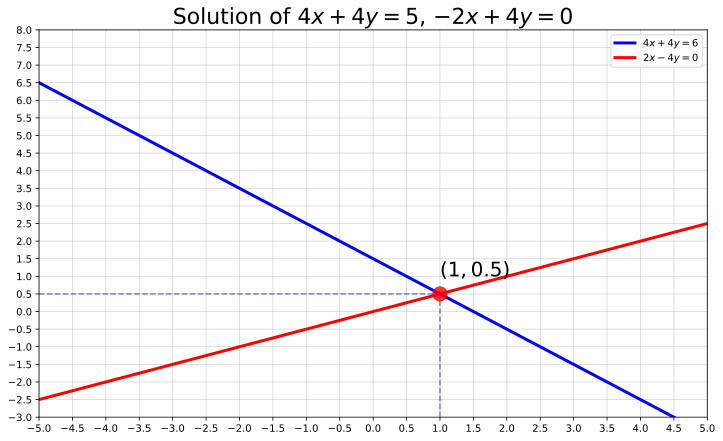

In [2]:
# Data preparation
x = np.linspace(-5, 5, 100)
y1 = (-4 * x + 6) / 4
y2 = 2 * x / 4

# Plot setup
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim([-5, 5])
ax.set_ylim([-3, 8])
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_title("Solution of $4x+4y=5$, $-2x+4y=0$", size=22)

# Plotting lines
plot_line(ax, x, y1, lw=3, label="$4x+4y=6$", color="b")
plot_line(ax, x, y2, lw=3, label="$2x-4y=0$", color="r")
plot_line(ax, [-5, 1], [0.5, 0.5], ls="--", color="b", alpha=0.5)
plot_line(ax, [1, 1], [-3, 0.5], ls="--", color="b", alpha=0.5)

# Adding scatter and text
s = "$(1,0.5)$"
ax.text(1, 0.5 + 0.5, s, fontsize=20)
plot_scatter(ax, 1, 0.5, s=200, zorder=5, color="r", alpha=0.8)

ax.legend()
ax.grid(which="major", axis="both", linestyle="-", alpha=0.5)

# Display plot
plt.show()

save_path = Path("./assets/02-systems-of-linear-equations-geometric-interpretation.svg")
if not save_path.exists():
    fig.savefig(save_path, dpi="figure", format="svg")

```{figure} ./assets/02-systems-of-linear-equations-geometric-interpretation.svg
---
name: 02-systems-of-linear-equations-geometric-interpretation
---
Geometric interpretation of the solution to the system of linear equations
$4x+4y=6$, $-2x+4y=0$.
```

More concretely, in a system of linear equations with two variables $x, y$, each
linear equation defines a line on the $x-y$-plane. Since a solution to a system
of linear equations must satisfy all equations simultaneously, the solution set
is the intersection of these lines. This intersection set can be a **line** (if
the linear equations describe the same line), a **point**, or **empty** (when
the lines are parallel) {cite}`deisenroth2020mathematics`. An illustration is
given in {numref}`02-systems-of-linear-equations-geometric-interpretation` for
the system of linear equations in
{eq}`02-systems-of-linear-equations-geometric-interpretation-eq-1` where the
solution space is the point $(x, y) = (1, 0.5)$.

---

For the sake of completeness, let's consider two more examples of systems of
linear equations with two variables $x, y$ where either the solution space is a
line or empty.

1. **Case: Solution Space is a Line (Infinite Solutions)** Equations
   representing the same line:

    ```{math}
    \begin{aligned}
        & \color{blue} x - y && \color{blue} = && \color{blue} 0 \\
        & \color{red} 2x - 2y && \color{red} = && \color{red} 0
    \end{aligned}
    ```

    These equations represent the same line. Any point on this line is a
    solution, leading to infinitely many solutions.

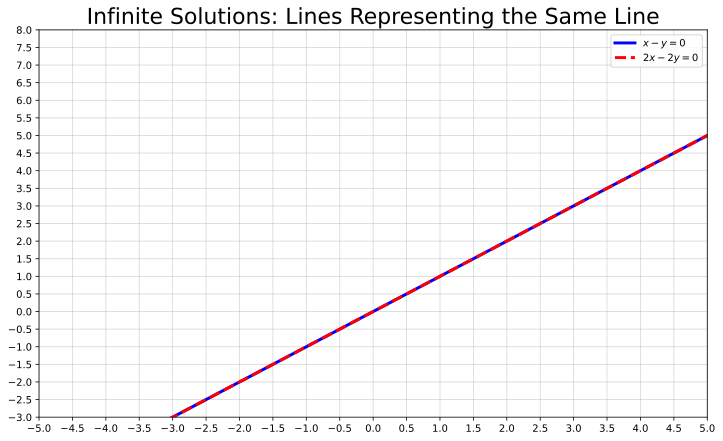

In [3]:
# Data preparation for case where solution space is a line
x = np.linspace(-5, 5, 100)
y_line = x  # y = x

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim([-5, 5])
ax.set_ylim([-3, 8])
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_title("Infinite Solutions: Lines Representing the Same Line", size=22)

# Plotting the same line twice
plot_line(ax, x, y_line, lw=3, label="$x - y = 0$", color="blue")
plot_line(ax, x, y_line, lw=3, label="$2x - 2y = 0$", color="red", ls='--')

ax.legend()
ax.grid(which="major", axis="both", linestyle="-", alpha=0.5)

# Display plot
plt.show()

2. **Case: Solution Space is Empty (No Solutions)** Equations representing
   parallel lines:

    ```{math}
    \begin{aligned}
        & \color{blue} x - y && \color{blue} = && \color{blue} 1 \\
        & \color{red} x - y && \color{red} = && \color{red} 2
    \end{aligned}
    ```

    These equations represent parallel lines which never intersect. Therefore,
    there is no point that satisfies both equations simultaneously, resulting in
    no solution.

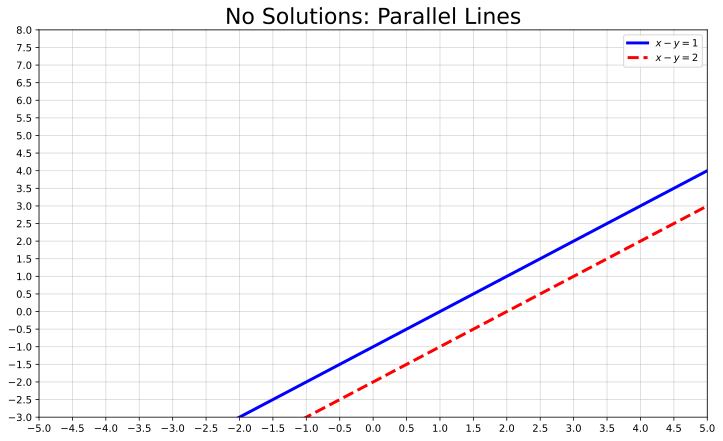

In [4]:
# Data preparation for case where solution space is empty
x = np.linspace(-5, 5, 100)
y1_empty = x - 1  # y = x - 1
y2_empty = x - 2  # y = x - 2

# Plot setup
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim([-5, 5])
ax.set_ylim([-3, 8])
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_title("No Solutions: Parallel Lines", size=22)

# Plotting parallel lines
plot_line(ax, x, y1_empty, lw=3, label="$x - y = 1$", color="blue")
plot_line(ax, x, y2_empty, lw=3, label="$x - y = 2$", color="red", ls='--')

ax.legend()
ax.grid(which="major", axis="both", linestyle="-", alpha=0.5)

# Display plot
plt.show()

We now take a detour to visit the concept of planes in three-dimensional space
$\mathbb{R}^3$ before returning to the interpretation of solution spaces in
3D-space.

## Planes

The treatment below concerns planes embedded in three dimensions, specially in
$\mathbb{R}^3$. Therefore, these planes are necessarily a
2D-[**subspace**](https://en.wikipedia.org/wiki/Linear_subspace).

### Properties of 2D-Planes

The following statements hold in three-dimensional Euclidean space but not in
higher dimensions, though they have higher-dimensional analogues:

-   Two distinct planes are either parallel or they intersect in a
    [line](<https://en.wikipedia.org/wiki/Line_(geometry)>).
-   A line is either parallel to a plane, intersects it at a single point, or is
    contained in the plane.
-   Two distinct lines
    [perpendicular](https://en.wikipedia.org/wiki/Perpendicular) to the same
    plane must be parallel to each other.
-   Two distinct planes perpendicular to the same line must be parallel to each
    other.

### Plane's Equations

#### Point–Normal Form and General Form of the Equation of a Plane

In a manner analogous to the way lines in a two-dimensional space are described
using a point-slope form for their equations, planes in a three dimensional
space have a natural description using a point in the plane and a vector
orthogonal to it (the normal vector) to indicate its "inclination".

Specifically, let $\mathbf{r}_0$ be the position vector of some point
$P_0 = (x_0, y_0, z_0)$, and let $\mathbf{n} = (a, b, c)$ be a nonzero vector.
The plane determined by the point $P_0$ and the vector $\mathbf{n}$ consists of
those points $P$, with position vector $\mathbf{r}$, such that the vector drawn
from $P_0$ to $P$ is perpendicular to $\mathbf{n}$. Recalling that two vectors
are perpendicular if and only if their dot product is zero, it follows that the
desired plane can be described as the set of all points $\mathbf{r}$ such that:

$$\mathbf{n} \cdot (\mathbf{r} - \mathbf{r}_0) = \mathbf{0}$$

The dot here means a dot product

Expanded this becomes

$$a (x-x_0)+ b(y-y_0)+ c(z-z_0)=0$$

which is the **point–normal** form of the equation of a plane. This is just a
linear equation:

$$ax + by + cz + d = 0$$

where

$$d = -(ax_0 + by_0 + cz_0)$$

which is the expanded form of $-\mathbf{n} \cdot \mathbf{r}_0$.

In mathematics it is a common convention to express the normal as a unit vector,
but the above argument holds for a normal vector of any non-zero length.

Conversely, it is easily shown that if $a,b,c$ and $d$ are constants and $a,b,c$
are not all zero, then the graph of the equation

$$ax + by + cz + d = 0$$

is a plane having the vector

$$\mathbf{n} = (a,b,c)$$

as a normal. This familiar equation for a plane is called the **general form**
of the equation of the plane.

> Thus for example a regression equation of the form $y = d + ax + cz$ with
> $b=-1$ establishes a best-fit plane in three-dimensional space when there are
> two explanatory variables.

##### Intuition (Hongnan)

The idea is given a 2D-plane embedded in a 3-D space, then we start off by
**assuming** there exists a point $P_0 = (x_0, y_0, z_0)$ on the plane;
furthermore, we define a vector $\mathbf{n} = (a, b, c)$ such that this vector
is orthogonal (perpendicular) to the plane - we call this vector a **normal
vector**. Next, assume $P = (x, y, z)$ be **any point on the plane**, and let us
define the position vector of $P_0$ and $P$ to be $\mathbf{r}_0$ and
$\mathbf{r}$ respectively.

From a mathematical standpoint, we are **fixing the point** $P_0$ so that for
**any point** $P$, the vector formed by the difference of these two position
vectors $\mathbf{r}_0$ and $\mathbf{r}$ will **always lie in the plane**. This
is important, because now what we do next on this $\mathbf{r} - \mathbf{r}_0$
will generalize for the whole plane.

By now, from the visual diagram in
[here](https://tutorial.math.lamar.edu/classes/calciii/eqnsofplanes.aspx), one
should realize that **given a fixed point $P_0$ and any point $P$, their
difference in vectors $\mathbf{r} - \mathbf{r}_0$ always lie on the plane, and
is also necessarily orthogonal to the normal vector $\mathbf{n}$**. Thus, we can
have by the **orthogonal vectors has dot product $\mathbf{0}$** to get:

$$
\mathbf{n} \cdot (\mathbf{r} - \mathbf{r}_0) = \mathbf{0} \implies \mathbf{n} \cdot \mathbf{r} = \mathbf{n} \cdot \mathbf{r}_0
$$

This is a legit equation for the plane, and **holds for any vectors lying on the
plane**. Why so? Because recall (even geometrically) that **all vectors on the
plane must be orthogonal/perpendicular to the normal vector**, and **therefore
to check the validity of the equation, we just need to check if ANY POINT $P$ on
the plane, and substitute its positional vector $\mathbf{r}_0$ into the equation
$\mathbf{n} \cdot (\mathbf{r} - \mathbf{r}_0)$, must this equation be
$\mathbf{0}$?** The answer is yes, because $\mathbf{r} - \mathbf{r}_0$ is always
a vector on the plane, and hence orthogonal to $\mathbf{n}$.

---

##### Normal Vector need not touch the Vectors on the plane

If one is confused what is the meaning of the $\mathbf{r} - \mathbf{r}_0$, say
if this equals $\mathbf{r} - \mathbf{r}_0 = (2, 3, 4)$ and the normal is
$\mathbf{n} = (2, -8, 5)$, then even though the vector
$\mathbf{r} - \mathbf{r}_0$ lies on the plane (which means the vector is not a
position vector and does not start from the origin), that is okay because if one
recalls what a vector is, we can "simply move the $\mathbf{r} - \mathbf{r}_0$ to
make it start from the origin", and this vector will now be "position vector",
but still perpendicular to $\mathbf{n}$ whether it touches it or not.

#### Describing a plane with a point and two vectors lying on it

Alternatively, a plane may be described parametrically as the set of all points
of the form

$$\mathbf{r} = \mathbf{r}_0 + s\mathbf{v} + t\mathbf{w}$$

where $s$ and $t$ range over all real numbers, $\mathbf{v}$ and $\mathbf{w}$ are
given linearly independent defining the plane, and $\mathbf{r}_0$ is the vector
representing the position of an arbitrary (but fixed) point on the plane. The
vectors $\mathbf{v}$ and $\mathbf{w}$ can be visualized as vectors starting at
$\mathbf{r}_0$ and pointing in different directions along the plane. The vectors
$\mathbf{v}$ and $\mathbf{w}$ can be perpendicular, but cannot be parallel.

---

**Note: In Linear Algebra, most mentions of planes are associated with vector
spaces (subspaces), and hence contains the origin. Therefore, we often describe
the plane as the set of points spanned by two linearly independent vectors.**

$$\mathbf{r} = s\mathbf{v} + t\mathbf{w}$$

notice that we do not specify $\mathbf{r}_0$ here since we have the zero vector.

#### Vector Equation of a Plane

From the previous section, the **Vector Equation** of a plane is:

$$
\mathbf{n} \cdot (\mathbf{r} - \mathbf{r}_0) = \mathbf{0} \iff \mathbf{n} \cdot \mathbf{r} = \mathbf{n} \cdot \mathbf{r}_0 \iff \mathbf{n} \cdot \mathbf{r} = d
$$

where $d = \mathbf{n} \cdot \mathbf{r}_0$.

<img src="https://storage.googleapis.com/reighns/reighns_ml_projects/docs/linear_algebra/plane_cartesian_and_vector.PNG" style="margin-left:auto; margin-right:auto"/>
<p style="text-align: center">
    <b>Fig; Vector and Cartesian Equation; Courtesy of https://www.tuitionkenneth.com/h2-maths-parametric-scalar-product-cartesian.</b>
</p>

#### Cartesian Equation of Plane

From the previous section, the **Cartesian Equation** of a plane is:

$$
ax + by + cz + d = 0 \iff ax + by + cd = d
$$

where $d$ is a constant $-(ax_0 + by_0 + cz_0)$ and hence we are less pedantic
about the sign in the equation above.

#### Parametric Equation of a Plane

The **Parametric Equation** of a plane is:

$$
\mathbf{r} = \mathbf{r}_0 + s\mathbf{v} + t\mathbf{w}
$$

<img src="https://storage.googleapis.com/reighns/reighns_ml_projects/docs/linear_algebra/plane_parametric.PNG" style="margin-left:auto; margin-right:auto"/>
<p style="text-align: center">
    <b>Fig; Parametric Equation; Courtesy of https://www.tuitionkenneth.com/h2-maths-parametric-scalar-product-cartesian.</b>
</p>

## How to plot a plane in Python

Let's say you want to plot the column space of a matrix

$$\mathbf{A} = \begin{bmatrix} 3 & -1 \\ 2 & 4 \\ -1 & 1 \end{bmatrix}$$

where the column space of $\mathbf{A}$ is just the span of the columns:

$$
\text{col}(\mathbf{A})=\text{span}\left\{\left[ \matrix{3\cr 2\cr -1}\right],\ \left[\matrix{-1\cr 4\cr 1}\right]\right\}
$$

then it follows that since the two column vectors are linearly independent, then
the span or rather the column space of $\mathbf{A}$ is the **set** of points
that make up a plane:

$$\text{col}(\mathbf{A}) = \text{plane} = \{s\left[\matrix{3\cr 2\cr -1}\right] + t\left[\matrix{-1\cr 4\cr 1}\right] | s, t \in \mathbb{R} \}$$

Then, to plot it, we can express the X, Y and Z components as follows:

$$X = 3s - t \quad Y = 2s + 4t \quad Z = -s + t$$

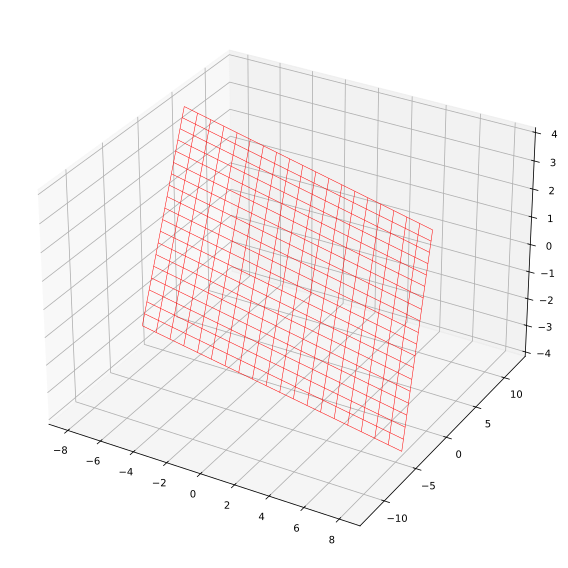

In [5]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

s = np.linspace(-2, 2, 20)
t = np.linspace(-2, 2, 20)
S, T = np.meshgrid(s, t)

X = 3*S - T
Y = 2*S + 4*T
Z = -S + T
ax.plot_wireframe(X, Y, Z, linewidth = .5, color = 'r')

## Determination by contained points and lines in hyperplane D-dimension?

Clarify

In a Euclidean space of any number of dimensions, a plane is uniquely determined
by any of the following:

-   Three non-collinear points (points not on a single line).
-   A line and a point not on that line.
-   Two distinct but intersecting lines.
-   Two distinct but parallel lines.

The phrase "in a Euclidean space of any number of dimensions" in the context of
the Wikipedia article might be a bit misleading. The specific ways to determine
a plane, such as using two distinct parallel lines, are uniquely applicable to
three-dimensional space, $\mathbf{R}^3$.

In higher-dimensional spaces, the concept of a "plane" as a 2D subspace still
holds, but the ways in which you define or determine it change due to the
additional dimensions. For instance, in 4D or higher, two parallel lines don't
uniquely determine a plane because there's more spatial freedom for the plane to
exist in different orientations.

So, it's important to contextualize these statements: while the methods listed
can define a plane in 3D space, they might not directly apply or mean the same
in higher dimensions.

## Solution Space in 3D (Planes)

## References and Further Readings

-   [Wikipedia: System of linear equations](https://en.wikipedia.org/wiki/System_of_linear_equations)
-   Deisenroth, M. P., Faisal, A. A., & Ong, C. S. (2020). _Mathematics for
    Machine Learning_. Cambridge University Press. (Chapter 3.1, Norms).
-   https://github.com/weijie-chen/Linear-Algebra-With-Python/blob/master/Chapter%201%20-%20Linear%20Equation%20System.ipynb
-   https://github.com/fastai/numerical-linear-algebra
-   [A First Course in Linear Algebra by Ken Kuttler](<https://math.libretexts.org/Bookshelves/Linear_Algebra/A_First_Course_in_Linear_Algebra_(Kuttler)>)
-   https://math.stackexchange.com/questions/1634411/why-adding-or-subtracting-linear-equations-finds-their-intersection-point
-   Dr Choo Yan Min's treatment of lines and planes are good.
-   https://tutorial.math.lamar.edu/classes/calciii/eqnsofplanes.aspx
-   https://www.tuitionkenneth.com/h2-maths-parametric-scalar-product-cartesian